# Approach for the problem

1. Load Data and Libraries
2. Data Visualization
3. Divide the data into X (images) and Y (Labels)
4. Divide the data into train and test
5. Apply ML and Evaluate
6. Single Layer Perceptron and Evaluate
7. Multilayer Perceptron and Evaluate
8. Deep Learning using Tensorflow and Keras



# Load Data and Libraries


In [ ]:
!unzip '/content/Digit Recognizer.zip'

Archive:  /content/Digit Recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


# Visualization

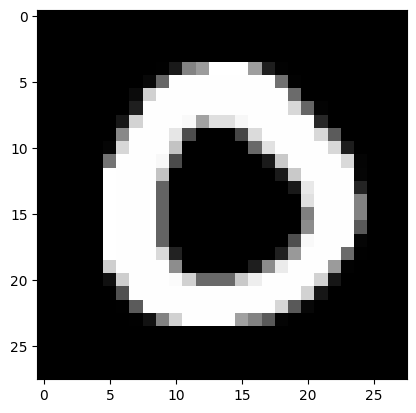

In [ ]:
features = ['pixel{}'.format(pixel_num) for pixel_num in range(0,784)]
row_to_examine = 4
image_data = np.reshape(train[features][row_to_examine : row_to_examine+1].to_numpy(), (28,28))
_ = plt.imshow(image_data , cmap = 'gray')

# Splitting of Data

In [ ]:
x = train.drop('label' , axis = 1)
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


# Model Evaluation Function

In [ ]:
def model_eval(actual , predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

#Fit the Model
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_rf)

The Accuracy of the Model is: 1.0
[[3336    0    0    0    0    0    0    0    0    0]
 [   0 3738    0    0    0    0    0    0    0    0]
 [   0    0 3321    0    0    0    0    0    0    0]
 [   0    0    0 3495    0    0    0    0    0    0]
 [   0    0    0    0 3246    0    0    0    0    0]
 [   0    0    0    0    0 3022    0    0    0    0]
 [   0    0    0    0    0    0 3350    0    0    0]
 [   0    0    0    0    0    0    0 3532    0    0]
 [   0    0    0    0    0    0    0    0 3227    0]
 [   0    0    0    0    0    0    0    0    0 3333]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      1.00      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
  

In [ ]:
model_eval(y_test , y_hat_test_rf)

The Accuracy of the Model is: 0.97
[[785   0   0   0   2   1   2   0   5   1]
 [  0 930   4   4   3   1   1   2   1   0]
 [  2   2 822   1   8   0   6   7   8   0]
 [  2   0  11 819   0  10   2   2   9   1]
 [  0   0   1   1 816   0   4   1   0   3]
 [  2   3   0   9   1 742   5   1   7   3]
 [  4   2   1   0   2   5 769   0   3   1]
 [  0   3  10   2   7   1   0 840   0   6]
 [  0   9   8   8   6   8   3   0 782  12]
 [  2   1   3  15  10   3   0   8   5 808]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       796
           1       0.98      0.98      0.98       946
           2       0.96      0.96      0.96       856
           3       0.95      0.96      0.96       856
           4       0.95      0.99      0.97       826
           5       0.96      0.96      0.96       773
           6       0.97      0.98      0.97       787
           7       0.98      0.97      0.97       869
           8       0.95      0.94      0.94    

# Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 50)

gb.fit(x_train , y_train)

GradientBoostingClassifier(n_estimators=50)

In [ ]:
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_gb)

The Accuracy of the Model is: 0.94
[[3267    0    4    6    5    3   13    2   35    1]
 [   1 3670   10   14    5    4   11    5   14    4]
 [  21   14 3094   44   31    4   14   40   44   15]
 [   8   21   63 3163    7   74    7   40   71   41]
 [   7    9   13    3 3038    6   17   10   20  123]
 [  35   15    8   90   20 2738   41    6   38   31]
 [  27    5    6    2   25   60 3191    2   32    0]
 [  13   22   48   15   29    7    0 3300    9   89]
 [  12   37   19   67   12   27   12    8 2970   63]
 [  15   12    9   44   97   14    1   78   30 3033]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3336
           1       0.96      0.98      0.97      3738
           2       0.95      0.93      0.94      3321
           3       0.92      0.91      0.91      3495
           4       0.93      0.94      0.93      3246
           5       0.93      0.91      0.92      3022
           6       0.96      0.95      0.96      3350
 

In [ ]:
model_eval(y_test , y_hat_test_gb)

The Accuracy of the Model is: 0.92
[[773   0   0   3   3   3   1   0  12   1]
 [  0 925   6   1   3   0   6   1   3   1]
 [  9   5 778   6  16   2   9  10  21   0]
 [  5   1  13 774   0  23   6   6  16  12]
 [  1   4   4   2 788   0   4   2   4  17]
 [  6   5   2  23  10 673  12   2  21  19]
 [  9   4   3   0   7  17 735   1  11   0]
 [  2   3  11   3  16   1   0 803   2  28]
 [  3  18   9  21   8  16   6   1 730  24]
 [  4   0   1  15  24   5   0  23   8 775]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       796
           1       0.96      0.98      0.97       946
           2       0.94      0.91      0.92       856
           3       0.91      0.90      0.91       856
           4       0.90      0.95      0.93       826
           5       0.91      0.87      0.89       773
           6       0.94      0.93      0.94       787
           7       0.95      0.92      0.93       869
           8       0.88      0.87      0.88    

# Single Layer Perceptron

In [ ]:
per = Perceptron()
per.fit(x_train , y_train)

Perceptron()

In [ ]:
y_hat_train_per = per.predict(x_train)
y_hat_test_per = per.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_per)

The Accuracy of the Model is: 0.89
[[3245    0    8    3    5    5   35    0   34    1]
 [   0 3661   13    3    3    2    6    3   42    5]
 [  13   53 2871   25   31    5  125   32  157    9]
 [  13   39  131 2889   16   38   57   25  247   40]
 [   4   14   10    0 3035    7   50    8   54   64]
 [  28   27   19  193   50 2188  198   11  272   36]
 [  14    6    2    0   10   16 3288    0   14    0]
 [  12   22   43    3   48    4    5 3214   39  142]
 [  18   97   25   36   37   75   51   10 2841   37]
 [  19   15   21   29  263   41    6  138  137 2664]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3336
           1       0.93      0.98      0.95      3738
           2       0.91      0.86      0.89      3321
           3       0.91      0.83      0.87      3495
           4       0.87      0.93      0.90      3246
           5       0.92      0.72      0.81      3022
           6       0.86      0.98      0.92      3350
 

In [ ]:
model_eval(y_test , y_hat_test_per)

The Accuracy of the Model is: 0.88
[[766   0   1   3   4   1  11   0   9   1]
 [  0 930   3   1   1   0   2   1   8   0]
 [  6  23 703   8  11   3  41  14  46   1]
 [  6   4  35 711   4  17  17   6  48   8]
 [  2   3   8   1 768   2  13   2  12  15]
 [  3  11   3  49  12 543  47   4  88  13]
 [  4   1   1   0   2   3 770   1   5   0]
 [  7   5  12   5  15   4   0 781  15  25]
 [  6  25   8   8   8  26  22   5 718  10]
 [  4   4   4  16  55   6   0  45  39 682]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       796
           1       0.92      0.98      0.95       946
           2       0.90      0.82      0.86       856
           3       0.89      0.83      0.86       856
           4       0.87      0.93      0.90       826
           5       0.90      0.70      0.79       773
           6       0.83      0.98      0.90       787
           7       0.91      0.90      0.90       869
           8       0.73      0.86      0.79    

# Multi Layer Perceptron

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (64 , 64 , 64) , random_state = 10 , verbose = 1)
mlp.fit(x_train , y_train)

Iteration 1, loss = 2.92790823
Iteration 2, loss = 0.61130416
Iteration 3, loss = 0.38984193
Iteration 4, loss = 0.29756884
Iteration 5, loss = 0.24079396
Iteration 6, loss = 0.19795728
Iteration 7, loss = 0.16671323
Iteration 8, loss = 0.15004896
Iteration 9, loss = 0.13379428
Iteration 10, loss = 0.11437175
Iteration 11, loss = 0.10237632
Iteration 12, loss = 0.08855856
Iteration 13, loss = 0.08247361
Iteration 14, loss = 0.08460366
Iteration 15, loss = 0.07807670
Iteration 16, loss = 0.06959152
Iteration 17, loss = 0.07807428
Iteration 18, loss = 0.07039426
Iteration 19, loss = 0.06856918
Iteration 20, loss = 0.05882026
Iteration 21, loss = 0.05527884
Iteration 22, loss = 0.05911925
Iteration 23, loss = 0.06163009
Iteration 24, loss = 0.05482740
Iteration 25, loss = 0.06275743
Iteration 26, loss = 0.04681039
Iteration 27, loss = 0.04495617
Iteration 28, loss = 0.04678297
Iteration 29, loss = 0.05041975
Iteration 30, loss = 0.04576628
Iteration 31, loss = 0.06041460
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 64, 64), random_state=10, verbose=1)

In [ ]:
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

In [ ]:
model_eval(y_train , y_hat_train_mlp)

The Accuracy of the Model is: 0.99
[[3327    1    0    0    1    1    2    1    3    0]
 [   0 3736    0    0    0    0    1    1    0    0]
 [   0    1 3315    1    0    0    0    2    2    0]
 [   0    1    9 3462    0    0    0    9   12    2]
 [   1    1    7    2 3215    0    1    1    4   14]
 [   0    0    0    8    1 3000    2    0   10    1]
 [   3    0    1    1    2    1 3339    0    3    0]
 [   0    2    3    0    2    0    0 3515    0   10]
 [   5    4    4    8    1    0    0    1 3204    0]
 [   0    1    9    5   11    1    0   13   10 3283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       0.99      1.00      0.99      3321
           3       0.99      0.99      0.99      3495
           4       0.99      0.99      0.99      3246
           5       1.00      0.99      1.00      3022
           6       1.00      1.00      1.00      3350
 

In [ ]:
model_eval(y_test , y_hat_test_mlp)

The Accuracy of the Model is: 0.96
[[780   1   1   0   0   1   5   1   4   3]
 [  0 934   3   0   2   2   0   2   3   0]
 [  1   0 830   2   3   0   5   7   8   0]
 [  2   2  15 809   0   8   0   2  15   3]
 [  1   1   3   1 795   1   4   1   3  16]
 [  6   1   2  15   2 721  12   0  12   2]
 [  8   1   0   0   0   1 773   0   4   0]
 [  0   3  12   4   6   2   0 836   0   6]
 [  3   7  15  11   1   6   5   3 781   4]
 [  1   0   4  10  17   2   0  15   5 801]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       796
           1       0.98      0.99      0.99       946
           2       0.94      0.97      0.95       856
           3       0.95      0.95      0.95       856
           4       0.96      0.96      0.96       826
           5       0.97      0.93      0.95       773
           6       0.96      0.98      0.97       787
           7       0.96      0.96      0.96       869
           8       0.94      0.93      0.93    

# Approach to Keras and Tensorflow


1. Load the dataset and Libraries
2. Declare the model
  * Sequential: Sequence of layers
  * Functional: Multi Modal/ Transfer Learning
3. Declare the Layers
  * Dense , Dropout
  * Number of Neurons , Act Function
4. Compile the model
  * Optimizer (SGD , Adam)
  * Loss Function (Cross Entropy , MSE , RMSE)
  * Metrics (Accuracy , F1 , Precision , Recall)
5. Fit the model
  * Pass X Train and Y Train
  * Pass X Test and Y Test
  * Epochs
  * Batch Size
6. Predict and Evaluate the model


## Import the Libraries

In [ ]:
from keras import Sequential
from keras.layers import Dense , Dropout
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam

## One Hot Encode the Output

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

## Declare Models and Layers

In [ ]:
model = Sequential()
model.add(Dense(256 , activation = 'relu' , input_shape = (784,))) # Layer 1 and Input Layer
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 2
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(256 , activation = 'relu')) # Layer 3
model.add(Dropout(0.2)) #Dropout Layer
model.add(Dense(10 , activation = 'softmax')) # Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,114 (1.28 MB)

 Trainable params: 335,114 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

## Compile The Model

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

## Fit the Model

In [ ]:
hist = model.fit(x_train , y_train_ohe , batch_size = 128 , epochs = 100 , validation_data = (x_test , y_test_ohe))

Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.6284 - loss: 10.9906 - val_accuracy: 0.8923 - val_loss: 0.4494
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8391 - loss: 0.6858 - val_accuracy: 0.9187 - val_loss: 0.2960
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8816 - loss: 0.4417 - val_accuracy: 0.9358 - val_loss: 0.2411
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9095 - loss: 0.3202 - val_accuracy: 0.9411 - val_loss: 0.2132
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9249 - loss: 0.2644 - val_accuracy: 0.9474 - val_loss: 0.1908
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9369 - loss: 0.2158 - val_accuracy: 0.9475 - val_loss: 0.1865
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9391 - loss: 0.2044 - val_accuracy: 0.9538 - val_loss: 0.1636
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9478 - loss: 0.1855 -

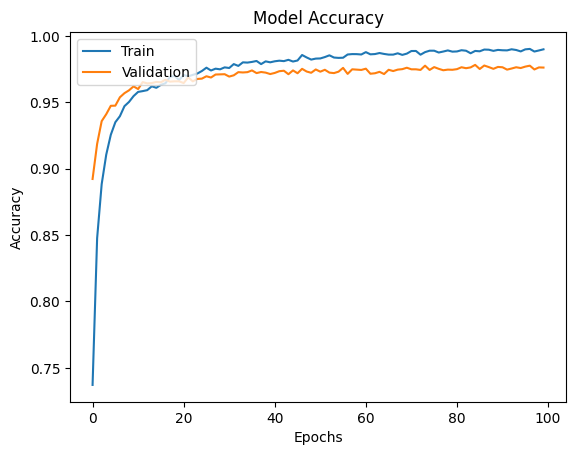

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

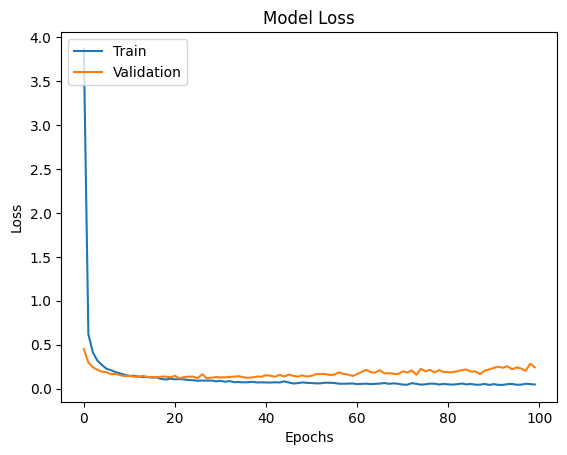

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

## Model Evaluation

In [ ]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
model_eval(y_train , y_hat_train_dense)

The Accuracy of the Model is: 1.0
[[3331    0    0    0    0    0    1    0    4    0]
 [   0 3736    0    0    0    0    0    0    2    0]
 [   0    0 3319    1    0    0    0    0    1    0]
 [   0    0    2 3486    0    1    0    0    6    0]
 [   0    0    0    0 3243    0    2    0    0    1]
 [   0    0    1    2    0 3015    1    0    3    0]
 [   1    0    0    0    0    0 3348    0    1    0]
 [   0    0    0    0    1    0    0 3530    0    1]
 [   0    0    4    0    0    2    0    0 3220    1]
 [   2    0    0    2    1    0    0    1    5 3322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      3738
           2       1.00      1.00      1.00      3321
           3       1.00      1.00      1.00      3495
           4       1.00      1.00      1.00      3246
           5       1.00      1.00      1.00      3022
           6       1.00      1.00      1.00      3350
  

In [ ]:
model_eval(y_test , y_hat_test_dense)

The Accuracy of the Model is: 0.98
[[782   0   2   1   1   1   3   0   4   2]
 [  0 938   2   1   1   0   0   2   2   0]
 [  0   2 846   1   2   0   1   2   2   0]
 [  0   0   4 837   0   9   0   2   4   0]
 [  3   1   2   0 809   0   4   1   2   4]
 [  0   0   2   9   0 743   7   0  10   2]
 [  6   2   1   0   1   2 774   0   1   0]
 [  0   0   7   2   4   0   0 853   2   1]
 [  3   6  12   4   1   3   7   2 792   6]
 [  1   0   0  10   5   2   0   6   5 826]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       796
           1       0.99      0.99      0.99       946
           2       0.96      0.99      0.98       856
           3       0.97      0.98      0.97       856
           4       0.98      0.98      0.98       826
           5       0.98      0.96      0.97       773
           6       0.97      0.98      0.98       787
           7       0.98      0.98      0.98       869
           8       0.96      0.95      0.95    